In [3]:
#import base pacakges
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # 3D plots
import matplotlib.tri as tri # make surface plot
from pathlib import Path # to extract data from registry
import re # to extract number in name
import scipy.optimize as opt # data fitting

# Project import from directory

In [4]:
from pathlib import Path

In [5]:
p=Path('.')
# list(path.glob'./*.dat') finds all data ".dat" data in entered directory
paths=list([x for x in p.iterdir() if x.is_dir() and x.name=='Seriöse Messung'][0].glob('./*.dat')) #use ** to also include subregistries
#remember to change name if directory name is changed
data=[]
for path in paths:
    data.append(np.genfromtxt(path,skip_header=1)[:,:3]) #all rows, only the first 3 columns

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


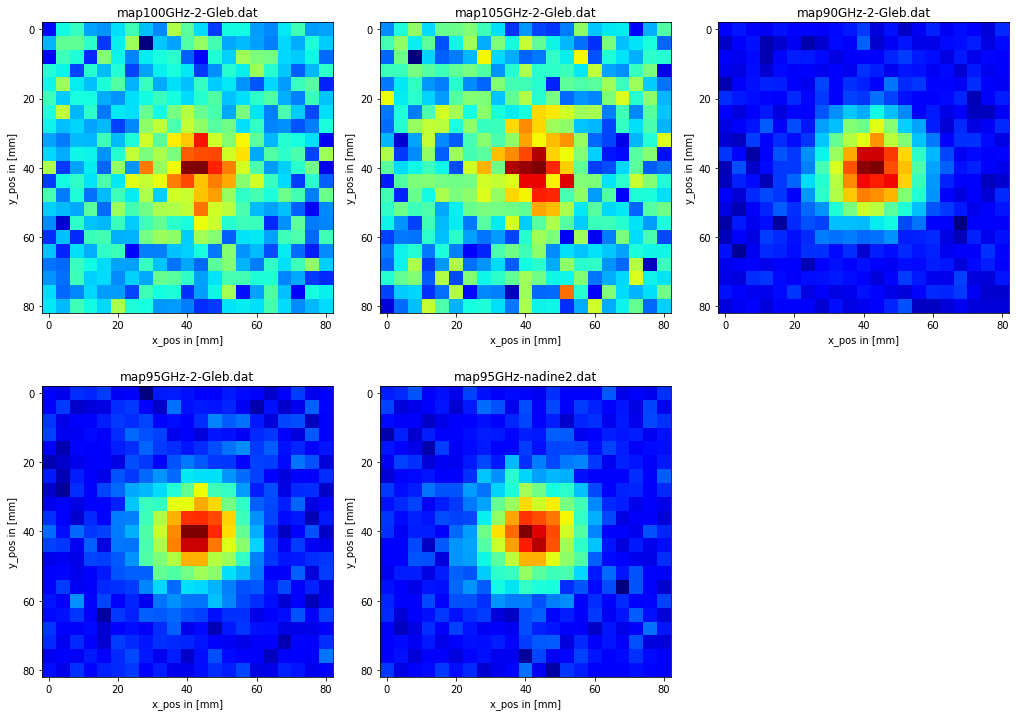

In [6]:
# plot
rows=int(len(data) / 3) + (len(data) % 3 > 0)
fig, axes = plt.subplots(rows, 3, figsize=(rows*7, 10),constrained_layout=True)
axes=axes.ravel()

for ax in axes[len(data):]: #delete abundant axes
    fig.delaxes(ax)
    
size=np.int(np.sqrt(len(data[0][:,2])))

plt.setp(axes, xticks=np.arange(0,size+1,5),xticklabels=np.arange(0,size+1,5)*4,
        yticks=np.arange(0,size+1,5),yticklabels=np.arange(0,size+1,5)*4,
        xlabel="x_pos in [mm]",ylabel="y_pos in [mm]")
# plt.subplots_adjust(wspace=0.2, hspace=-0.4)
for i,image in enumerate(data):
    size=np.int(np.sqrt(len(image[:,2])))
    image=image[:,2].reshape((size,size))
    axes[i].imshow(image, cmap='jet', interpolation='nearest')
    axes[i].set_title(paths[i].name)
fig.show()

# Project find beam profile

In [7]:
A,b,x_0,y_0,σ_x,σ_y=popt[0],popt[1],popt[2],popt[3],popt[4],popt[5]
y_0

NameError: name 'popt' is not defined

In [12]:
def gaussian_profile(coords,A=1,b=0,x_0=0,y_0=0,σ_x=1,σ_y=1,**kwargs):
    if ('popt' in kwargs):
        A,b,x_0,y_0,σ_x,σ_y=popt[0],popt[1],popt[2],popt[3],popt[4],popt[5]
        
    return A*np.exp(-((coords[0]-x_0)**2/(2*σ_x**2)+(coords[1]-y_0)**2/(2*σ_y**2)))+b
# Was das Modell nicht berücksichtigt:
    # Auftreffswinkel

In [13]:
# define data
X=np.linspace(-5,5,50)
Y=np.linspace(-5,5,50)
Z=[gaussian_profile((x,y)) for x in X for y in Y]

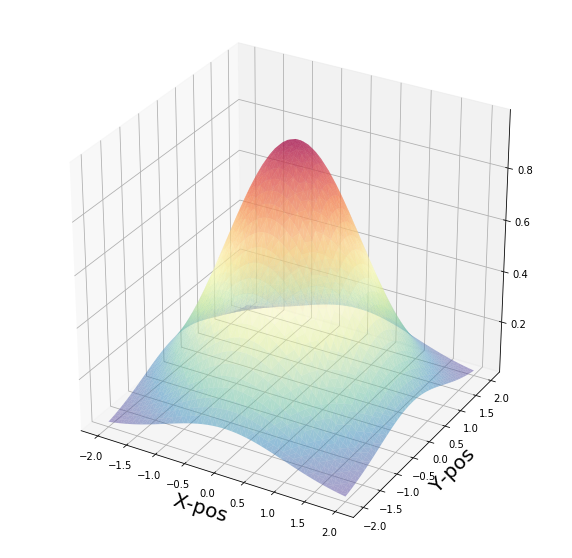

In [14]:
# define data
X=np.linspace(-2,2,50)
Y=np.linspace(-2,2,50)
Z=[gaussian_profile((x,y)) for x in X for y in Y]
X,Y=np.meshgrid(X,Y)
# plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X-pos', fontsize=20)
ax.set_ylabel('Y-pos', fontsize=20)
ax.plot_trisurf(X.ravel(), Y.ravel(), Z, cmap=plt.cm.Spectral_r,alpha=0.5)

In [15]:
initial_guess = (20_000,0,170,220,20,20)
popt, pcov = opt.curve_fit(gaussian_profile, (data[0][:,0], data[0][:,1]), data[0][:,2], p0=initial_guess)

In [16]:
popt

array([9472.69930956, 9789.92284806,  171.82308025,  210.64620611,
         10.65469647,   10.25716259])

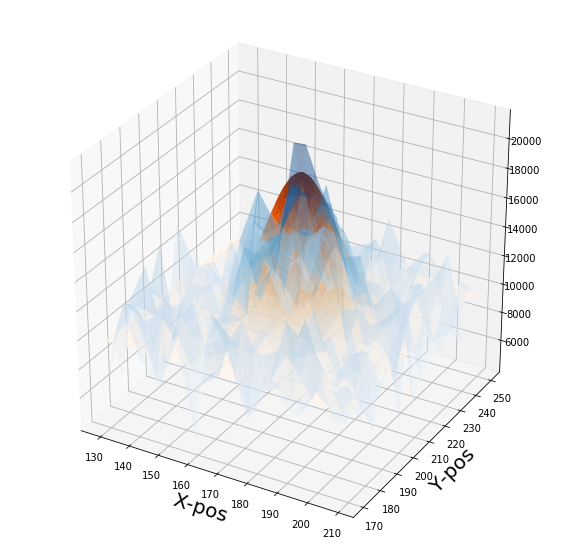

In [22]:
# define data
X=np.linspace(np.amin(data[0][:,0]),np.amax(data[0][:,0]),50)
Y=np.linspace(np.amin(data[0][:,1]),np.amax(data[0][:,1]),50)
Z=[gaussian_profile((x,y),popt=popt) for x in X for y in Y]
X,Y=np.meshgrid(X,Y)
# plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X-pos', fontsize=20)
ax.set_ylabel('Y-pos', fontsize=20)
ax.plot_trisurf(X.ravel(), Y.ravel(), Z, cmap='Oranges',alpha=0.9)
ax.plot_trisurf(data[0][:,0], data[0][:,1], data[0][:,2], cmap='Blues',alpha=0.25)

In [292]:
len(Z)

2500

In [201]:
?ax.plot_trisurf

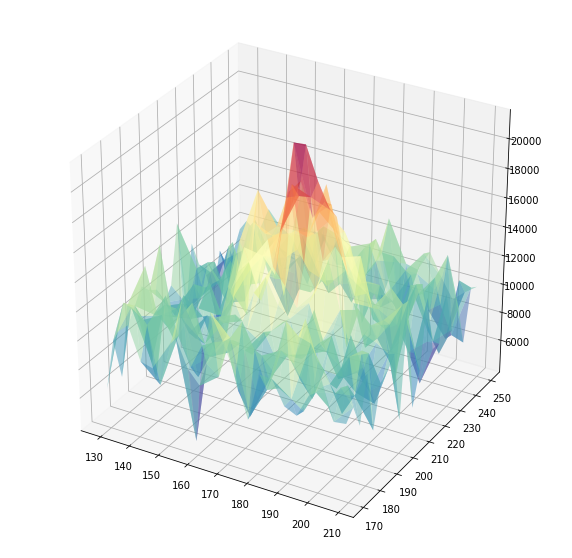

In [80]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(data[0][:,0], data[0][:,1], data[0][:,2], cmap=plt.cm.Spectral_r,alpha=0.5)

In [230]:
?plt.plot

In [256]:
def do(x,**d):
    return x,d

In [ ]:
a=paths[4].name
pattern=re.compile(r"(\D+)(\d+)")
x=pattern.match(a).groups()
print(x[1])

In [ ]:
a="results_item12345"
pattern=re.compile(r"(\D+)(\d+)")
x=pattern.match(a).groups()
print(x[1])



In [ ]:
import re
regex = re.compile('uniprotkb:P([0-9]*)')
print regex.findall(string)



In [ ]:
# Might get useful later:
# np.where(data[1][:,2]==np.amax(data[1][:,2]))
# np.unique(data[0][:,0])